# Basic usage

<!-- {{ add_binder_block(page) }} -->

Let us start with a simple example to illustrate the use of `ruptures`: generate a 3-dimensional piecewise constant signal with noise and estimate the change points.

## Setup
First, we make the necessary imports.

In [1]:
import matplotlib.pyplot as plt  # for display purposes

import ruptures as rpt  # our package

## Generate and display the signal

Let us generate a 3-dimensional piecewise constant signal with Gaussian noise.

In [2]:
n_samples, n_dims, sigma = 1000, 3, 2
n_bkps = 4  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std=sigma)

The true change points of this synthetic signal are available in the `bkps` variable.

In [3]:
print(bkps)

[207, 399, 616, 805, 1000]


Note that the first four element are change point indexes while the last is simply the number of samples.
(This is a technical convention so that functions in `ruptures` always know the length of the signal at hand.)

It is also possible to plot our \(\mathbb{R}^3\)-valued signal along with the true change points with the `rpt.display` function.
In the following image, the color changes whenever the mean of the signal shifts.

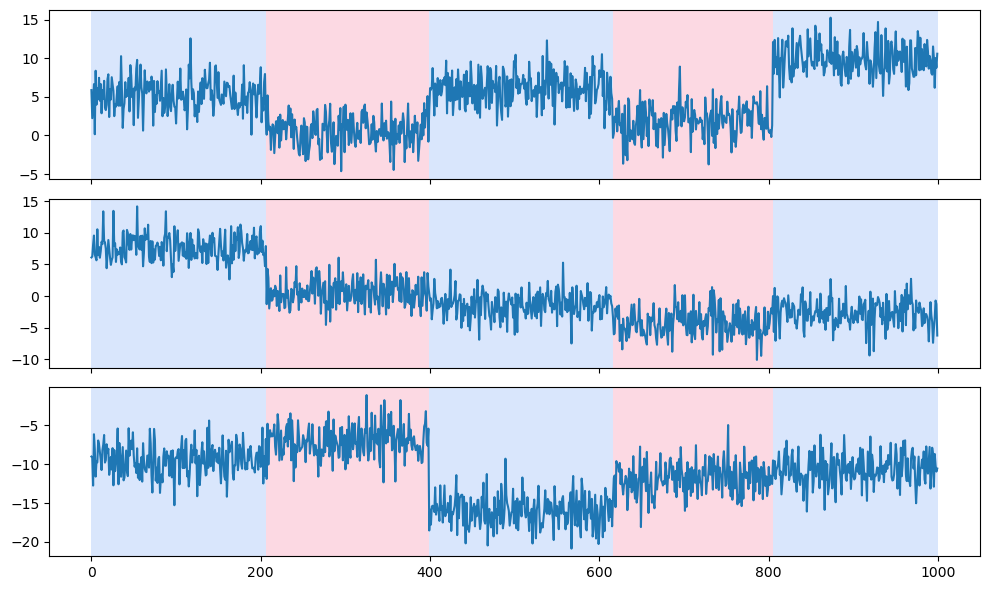

In [4]:
fig, ax_array = rpt.display(signal, bkps)

## Change point detection
We can now perform change point detection, meaning that we find the indexes where the signal mean changes.
To that end, we minimize the sum of squared errors when approximating the signal by a piecewise constant signal.
Formally, for a signal \( y_0 , y_1 , \dots , y_{T-1} \) (\( T \) samples), we solve the following optimization problem, over all possible change positions \( t_1 < t_2 < \dots < t_K \)
where the number \( K \) of changes is defined by the user:

\[
    \hat{t}_1, \hat{t}_2,\dots,\hat{t}_K = \arg\min_{t_1,\dots,t_K} V(t_1,t_2,\dots,t_K)
\]

with

\[
    V(t_1,t_2,\dots,t_K) := \sum_{k=0}^K\sum_{t=t_k}^{t_{k+1}-1} \|y_t-\bar{y}_{t_k..t_{k+1}}\|^2
\]


where \( \bar{y}_{t_k..t_{k+1}} \) is the empirical mean of the sub-signal \( y_{t_k}, y_{t_k+1},\dots,y_{t_{k+1}-1} \).
(By convention \( t_0=0 \) and \( t_{K+1}=T \).)

This optimization is solved with dynamic programming, using the [`Dynp`](../user-guide/detection/dynp.md) class. (More information in the section [What is change point detection?](/what-is-cpd) and the [User guide](/user-guide).)


In [5]:
# detection
algo = rpt.Dynp(model="l2").fit(signal)
result = algo.predict(n_bkps=4)

print(result)

[210, 400, 615, 805, 1000]


Again the first elements are change point indexes and the last is the number of samples.

## Display the results

To visualy compare the true segmentation (`bkps`) and the estimated one (`result`), we can resort to `rpt.display` a second time.
In the following image, the alternating colors indicate the true breakpoints and the dashed vertical lines, the estimated breakpoints.

In [ ]:
import numpy as np

In [ ]:
# display
rpt.display(signal, bkps, result)
plt.show()

In this simple example, both are quite similar and almost undistinguishable.